## GMT plots 

### Installing 
`works on laptop with latest software`
not
`desktop which is behind a generation`

In [1]:
import pygmt as gmt

In [2]:
fig = gmt.Figure()


fig.coast(region=[-180, -140, 50, 80], projection='B-160/60/55/60/6i', land='black', water='lightgrey',
          frame=True,U=True) 

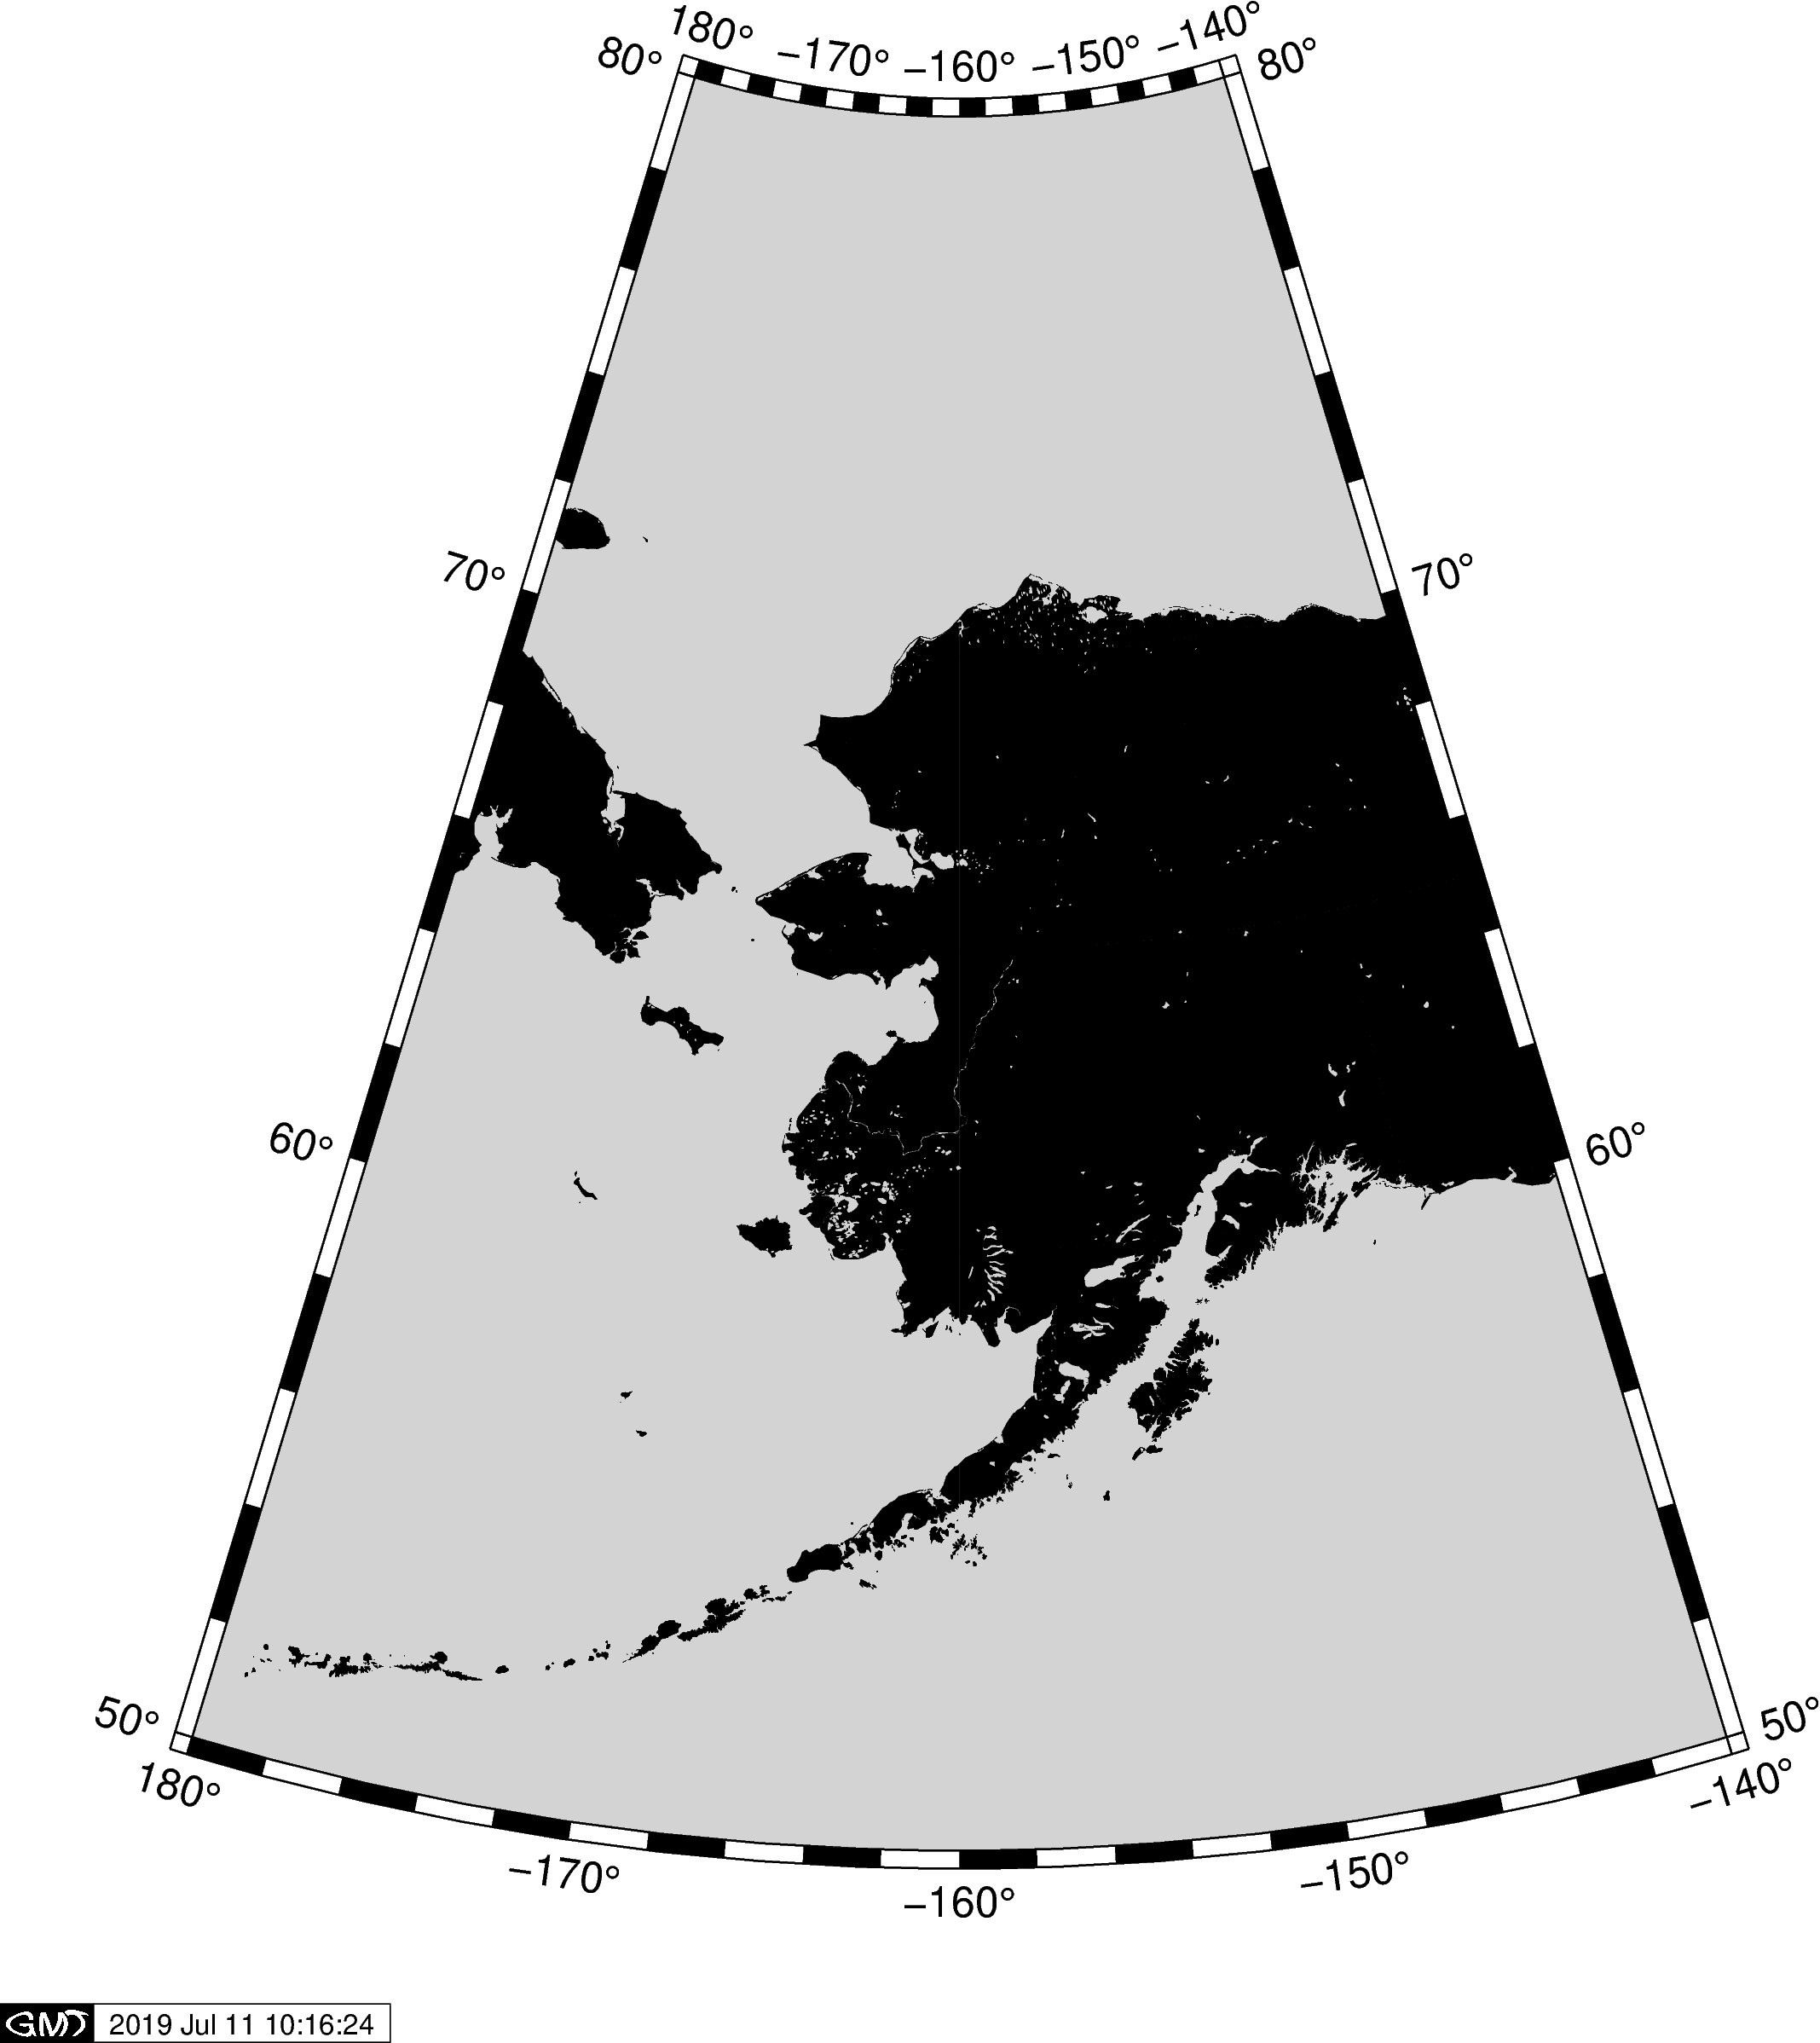

In [3]:
fig.show()

In [4]:
from netCDF4 import Dataset

def etopo1_subset(file='etopo1.nc', region=None):
    """ read in ardemV2 topography/bathymetry. """
    
    bathydata = Dataset(file)
    
    topoin = bathydata.variables['altitude'][:]
    lons = bathydata.variables['longitude'][:]
    lats = bathydata.variables['latitude'][:]
    bathydata.close()
    
    return(topoin, lats, lons)

In [5]:
(topoin, lats, lons) = etopo1_subset(file='data/etopo1_tmp.nc')

import xarray as xa

xdf = xa.open_dataset('data/etopo1_tmp.nc')
xdf.altitude > 1000

<xarray.DataArray 'altitude' (latitude: 781, longitude: 3001)>
array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * latitude   (latitude) float64 65.0 65.02 65.03 65.05 ... 77.97 77.98 78.0
  * longitude  (longitude) float64 -180.0 -180.0 -180.0 ... -130.0 -130.0 -130.0

In [6]:
bathydata = gmt.datasets.load_earth_relief(resolution='01m')

In [16]:
fig = gmt.Figure()


fig.grdimage(xdf.where((xdf.altitude<50) & (xdf.altitude >-5000)).altitude,cmap='gray',
             region=[-180, -130, 65, 78], projection='B-155/60/55/60/6i')
fig.grdcontour(xdf.altitude,interval='intervals.txt',annotation=100)
fig.coast(shorelines='black',land='white',frame=True,U=True)


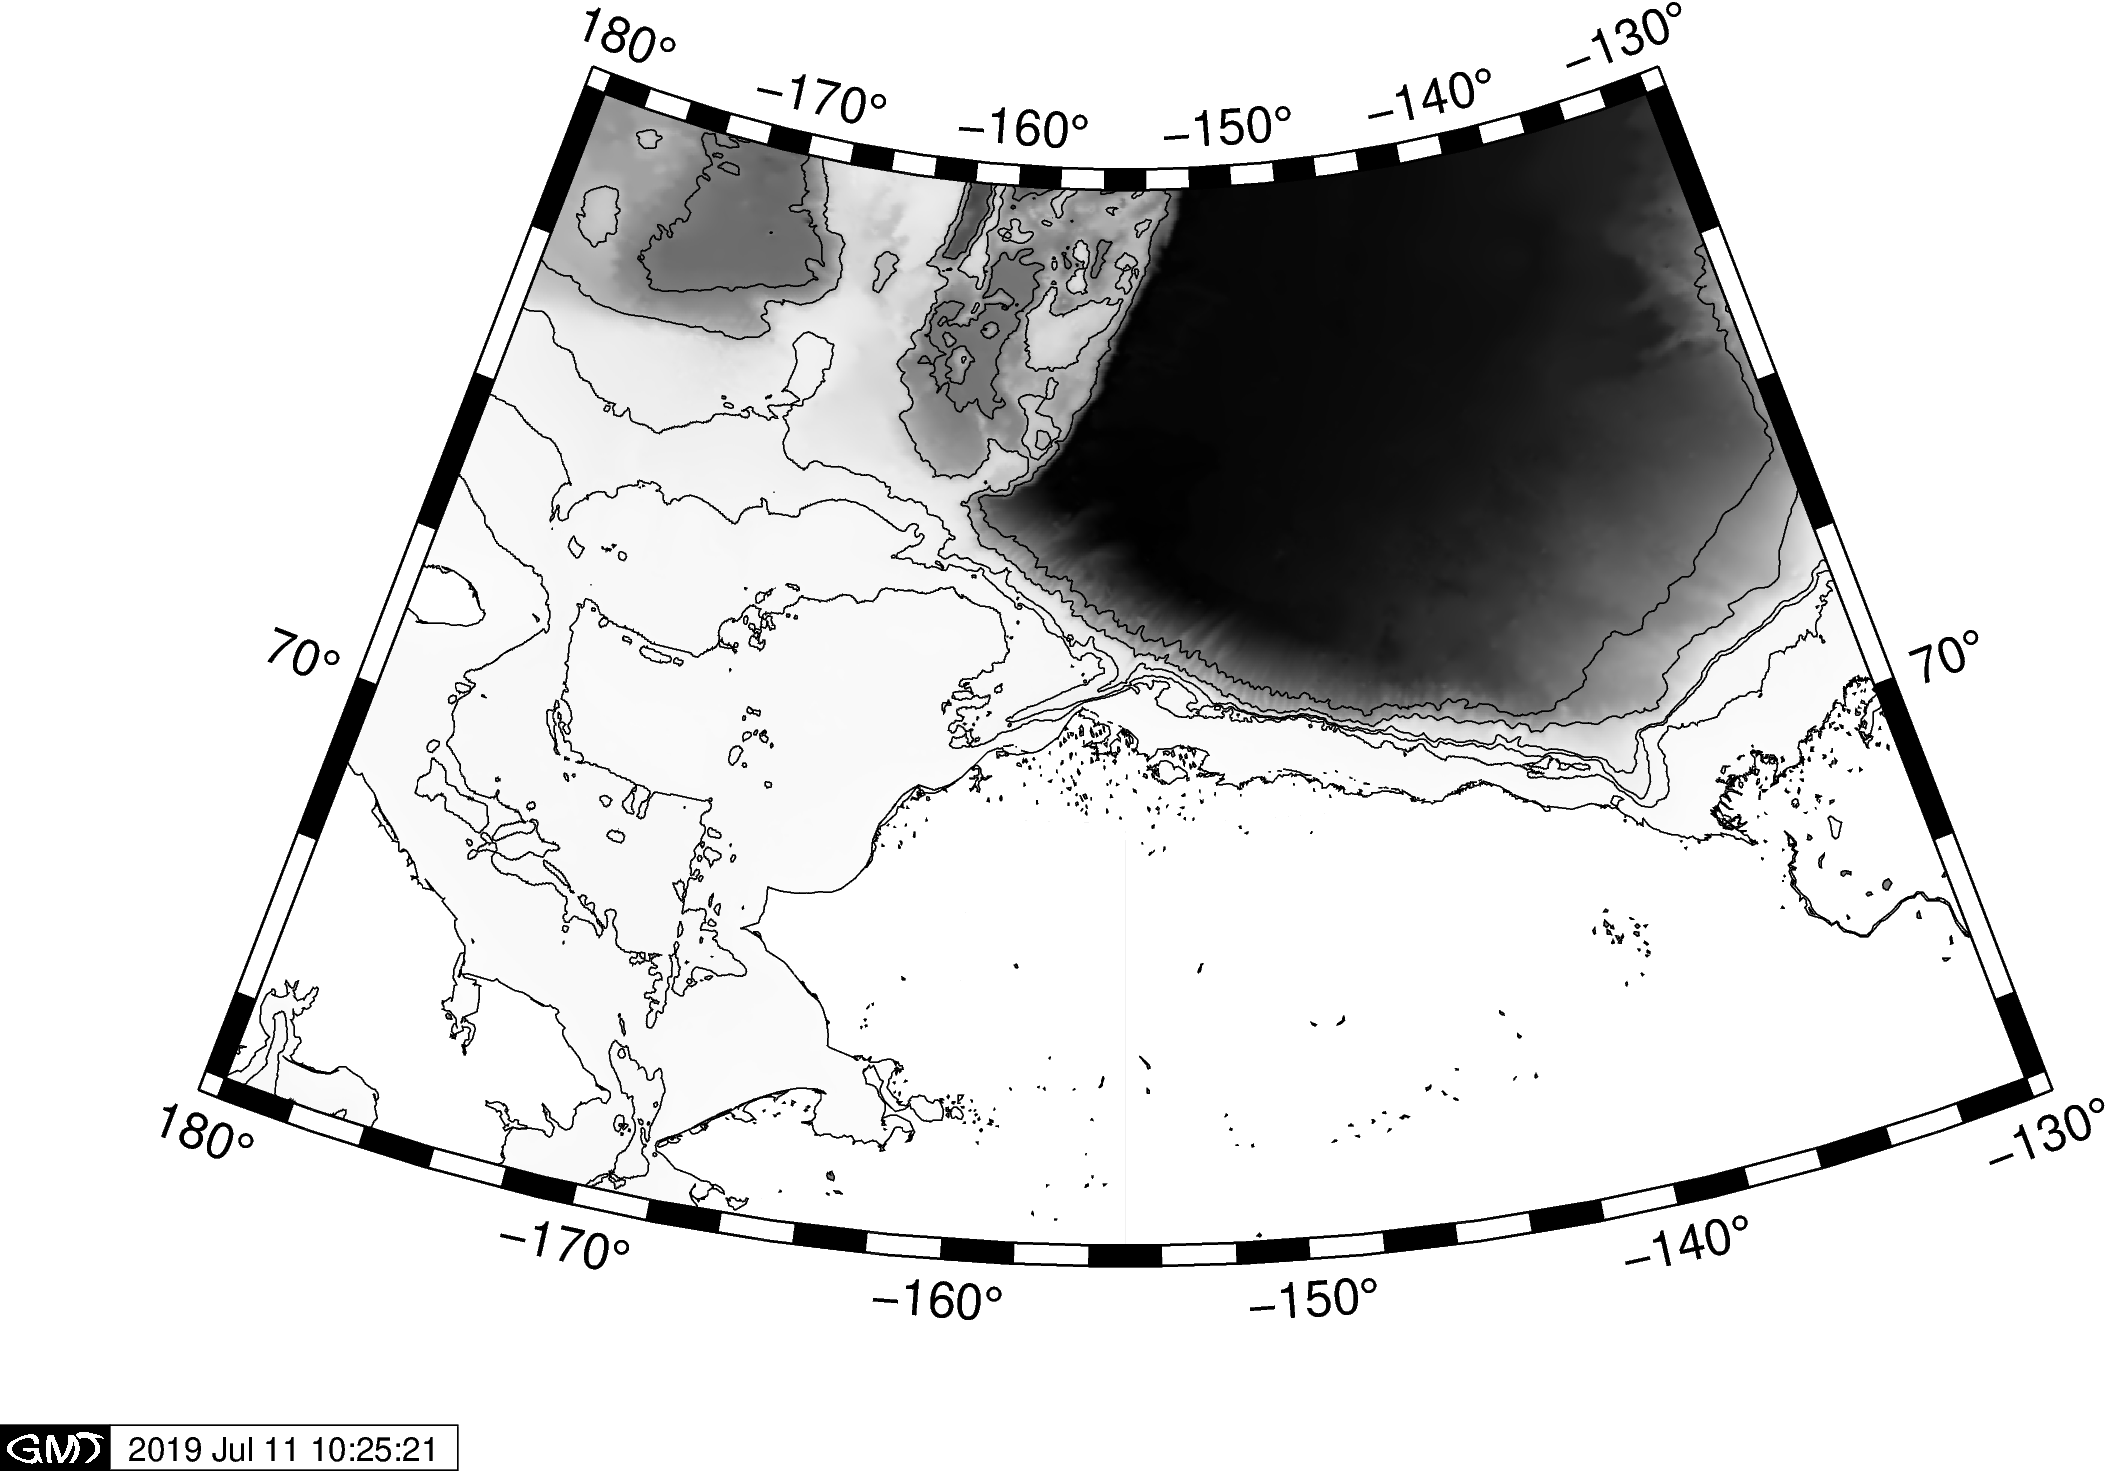

In [17]:
fig.show()

In [9]:
fig.savefig('ArcticDrifters_ShelfFlow_GMT.eps')
fig.savefig('ArcticDrifters_ShelfFlow_GMT.png')